In [2]:
import pandas as pd
import numpy as np

In [6]:
data = "data/bonaparte_w_10hz_csv.csv"

df = pd.read_csv(data, comment='/', skip_blank_lines=True)
df

,X,Y,LINE,TIME,EASTING,NORTHING,RALT,BALT,GPSALT,DEMLEV,...,F_TOT,F_URA,R_COS,R_LIVE,R_POT,R_RDN,R_THO,R_TOT,R_UPU,R_URA
-121.321138,51.216193,114400,62965.8,617253.2,5675206.1,124.3,1082.7,1184.0,1059.7,1168.9,...,*,*,*,*,*,*,*,*,*,NaN
-121.321210,51.216161,114400,62965.9,617248.2,5675202.4,124.8,1082.9,1184.0,1059.2,1168.8,...,*,*,*,*,*,*,*,*,*,NaN
-121.321283,51.216129,114400,62966.0,617243.2,5675198.7,125.3,1083.3,1183.9,1058.6,1168.7,...,1.20,268.2,0.901,165.60,7.56,17.40,1265,4.60,29.20,NaN
-121.321357,51.216096,114400,62966.1,617238.1,5675195.0,125.8,1083.7,1183.9,1058.1,1168.6,...,*,*,*,*,*,*,*,*,*,NaN
-121.321430,51.216064,114400,62966.2,617233.1,5675191.3,126.3,1084.2,1183.8,1057.5,1168.5,...,*,*,*,*,*,*,*,*,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-121.300431,51.710620,125300,66368.1,617423.2,5730220.5,139.3,963.7,1072.1,932.8,1059.1,...,*,*,*,*,*,*,*,*,*,NaN
-121.300497,51.710589,125300,66368.2,617418.7,5730216.9,139.7,965.2,1072.5,932.8,1059.1,...,*,*,*,*,*,*,*,*,*,NaN
-121.300565,51.710558,125300,66368.3,617414.1,5730213.4,140.1,966.8,1072.8,932.7,1059.2,...,*,*,*,*,*,*,*,*,*,NaN
-121.300631,51.710528,125300,66368.4,617409.6,5730209.9,140.4,968.5,1073.2,932.8,1059.2,...,*,*,*,*,*,*,*,*,*,NaN


In [7]:
# Extract longitude (X) and latitude (Y)
longitudes = df['X'].values
latitudes = df['Y'].values

# Create meshgrid from unique sorted longitudes and latitudes
lon_unique = np.sort(np.unique(longitudes))
lat_unique = np.sort(np.unique(latitudes))
lon_mesh, lat_mesh = np.meshgrid(lon_unique, lat_unique)

lon_mesh.shape, lat_mesh.shape


((148, 186537), (148, 186537))

/Users/mirei/miniconda3/envs/eosc211/lib/python3.10/site-packages/matplotlib/image.py:484: RuntimeWarning: overflow encountered in subtract
  A_scaled -= a_min
/Users/mirei/miniconda3/envs/eosc211/lib/python3.10/site-packages/matplotlib/image.py:484: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min
/Users/mirei/miniconda3/envs/eosc211/lib/python3.10/site-packages/matplotlib/image.py:485: RuntimeWarning: overflow encountered in subtract
  vrange -= a_min
/Users/mirei/miniconda3/envs/eosc211/lib/python3.10/site-packages/matplotlib/image.py:505: RuntimeWarning: overflow encountered in multiply
  A_resampled *= ((a_max - a_min) / frac)
/Users/mirei/miniconda3/envs/eosc211/lib/python3.10/site-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


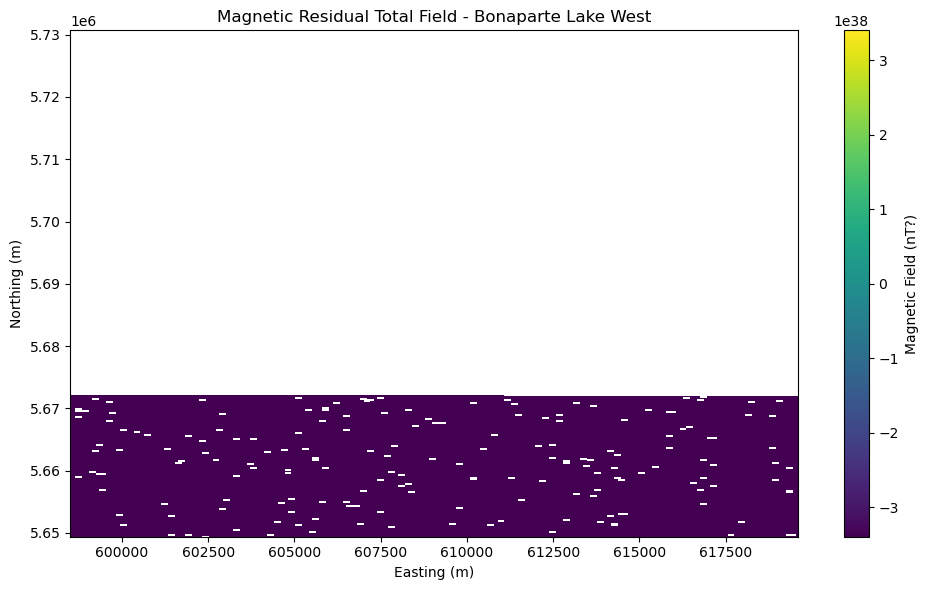

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Grid metadata inferred from XML
minx, maxx = 598500, 619600
miny, maxy = 5649400, 5730700
spacing = 100  # meters
nx = int((maxx - minx) / spacing) + 1  # 212 columns
ny = int((maxy - miny) / spacing) + 1  # 819 rows

# Read binary data assuming it's a flat float32 array
file_path = "data/Magres_trm.GRD"
data = np.fromfile(file_path, dtype=np.float32)

# Check if data size matches expectations
expected_size = nx * ny
actual_size = data.size

# Trim or pad if needed
if actual_size > expected_size:
    data = data[:expected_size]
elif actual_size < expected_size:
    data = np.pad(data, (0, expected_size - actual_size), constant_values=np.nan)

# Reshape to 2D grid
grid = data.reshape((ny, nx))

# Generate coordinate axes
x = np.linspace(minx, maxx, nx)
y = np.linspace(miny, maxy, ny)

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(grid, extent=[minx, maxx, miny, maxy], origin="lower", cmap="viridis", aspect='auto')
plt.colorbar(label="Magnetic Field (nT?)")
plt.title("Magnetic Residual Total Field - Bonaparte Lake West")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.tight_layout()
plt.show()


In [2]:
!apt install libgdal-dev -y
!pip install GDAL


The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.

  Using cached gdal-3.10.2.tar.gz (838 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for GDAL: filename=gdal-3.10.2-cp310-cp310-macosx_11_0_arm64.whl size=1171450 sha256=a5ae6ff7e8c396fe36939ca3f49a1a523bd01b4b11e3fb469f072f63913c72ff
  Stored in directory: /Users/mirei/Library/Caches/pip/wheels/70/2e/6b/4b9e2a8b310b03b373bc1d2bc25896179b341f03e9f39b1a08
Successfully built GDAL


In [17]:
from osgeo import gdal
import matplotlib.pyplot as plt

# Open the grid file
dataset = gdal.Open("data/Magres_trm.GRD")

# # Read raster band
# band = dataset.GetRasterBand(1)
# grid = band.ReadAsArray()

# # Get georeferencing
# gt = dataset.GetGeoTransform()
# minx = gt[0]
# miny = gt[3] + dataset.RasterYSize * gt[5]
# maxx = gt[0] + dataset.RasterXSize * gt[1]
# maxy = gt[3]

# # Plot
# plt.imshow(grid, extent=[minx, maxx, miny, maxy], origin='lower', cmap='viridis')
# plt.colorbar(label="Magnetic Field (nT)")
# plt.title("Geosoft Magnetic Grid")
# plt.xlabel("Easting (m)")
# plt.ylabel("Northing (m)")
# plt.show()
dataset

ERROR 4: `data/Magres_trm.GRD' not recognized as being in a supported file format.


In [14]:
dataset